In [11]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna\

ModuleNotFoundError: No module named 'ta'

In [12]:
import pandas as pd
import pandas_ta as ta

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
# Create a DataFrame so 'ta' can be used.
df = pd.DataFrame()

# Help about this, 'ta', extension
help(df.ta)

# List of all indicators
df.ta.indicators()

# Help about the log_return indicator
help(ta.log_return)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(df, **kwargs)
 |  
 |  AnalysisIndicators is a class that extends the Pandas DataFrame via
 |  Pandas @pd.api.extensions.register_dataframe_accessor('name') decorator.
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis that allows us
 |  to apply technical indicators by extension.  Even though 'ta' is a
 |  Pandas DataFrame Extension, you can still call the Indicators
 |  individually. Use help() if needed.
 |  
 |  By default the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume.  You can override the defaults by providing the
 |  it's replacement name when calling the indicator.  For example, to call the indicator hl2().
 |  
 |  With 'default' columns: open, high, low, close, and volume.
 |  >>> df.ta.hl2()
 |  >>> df.ta(kind="hl2")
 |  
 |  With DataFrame columns: Open, High, Low, Close, and Volume.
 |  >>>

In [15]:
df = pd.read_json('11.01.2021.json')

In [16]:
df

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1111.520000,253.800000,337.951143,28.70
2,BNBUSDT,39.784300,18.200000,118.595055,-103.18
4,NEOUSDT,22.466000,13.200000,70.196970,-243.26
5,LTCUSDT,145.000000,49.960000,190.232186,-26.67
6,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
7,ADAUSDT,0.277740,0.090390,207.268503,-16.25
8,XRPUSDT,0.287110,0.214700,33.726129,-614.46
9,EOSUSDT,2.741200,2.893900,-5.276616,4666.54
11,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
12,XLMUSDT,0.255730,0.086310,196.292434,-22.75


In [17]:
print('Dataframe shape is: ', df.shape)

Dataframe shape is:  (235, 5)


In [18]:
df.columns

Index(['symbol', 'price2021-01-11', 'price2020-06-01', 'price_change',
       'compare_to_btc'],
      dtype='object')

In [19]:
df.info

<bound method DataFrame.info of             symbol  price2021-01-11  price2020-06-01  price_change  \
1          ETHUSDT      1111.520000       253.800000    337.951143   
2          BNBUSDT        39.784300        18.200000    118.595055   
4          NEOUSDT        22.466000        13.200000     70.196970   
5          LTCUSDT       145.000000        49.960000    190.232186   
6         QTUMUSDT         2.933000         1.924000     52.442827   
7          ADAUSDT         0.277740         0.090390    207.268503   
8          XRPUSDT         0.287110         0.214700     33.726129   
9          EOSUSDT         2.741200         2.893900     -5.276616   
11        IOTAUSDT         0.378100         0.258500     46.266925   
12         XLMUSDT         0.255730         0.086310    196.292434   
13         ONTUSDT         0.565800         0.634600    -10.841475   
14         TRXUSDT         0.029700         0.018240     62.828947   
15         ETCUSDT         7.582000         7.319500      

In [20]:
df.describe()

,price2021-01-11,price2020-06-01,price_change,compare_to_btc
count,235.000000,235.000000,235.000000,235.000000
mean,169.240049,98.693810,24.901859,3922.549532
std,2058.462608,806.802286,132.469914,28763.349264
min,0.000072,0.000092,-99.848980,-13181.180000
25%,0.050515,0.078655,-63.628912,-151.105000
50%,0.514310,1.050000,-10.870654,352.090000
75%,4.030500,11.115000,62.276980,641.795000
max,31438.640000,9865.000000,740.126953,268179.800000


In [21]:
df.loc[4, 'price2021-01-11']

22.466

In [22]:
df.reset_index(inplace = True)

In [23]:
df.drop('index', axis=1)

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,EOSUSDT,2.741200,2.893900,-5.276616,4666.54
8,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
9,XLMUSDT,0.255730,0.086310,196.292434,-22.75


In [24]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

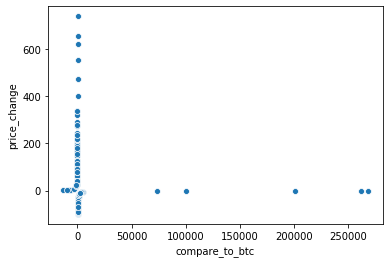

In [25]:
sns.scatterplot(y = df.price_change, x = df.compare_to_btc)

In [26]:
df[df['compare_to_btc'] > 50000]

,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
16,20,PAXUSDT,1.0004,1.0013,-0.089883,268179.80
17,23,USDCUSDT,1.0006,1.0030,-0.239282,100800.60
21,27,USDSUSDT,0.9968,1.0001,-0.329967,73125.05
66,73,BUSDUSDT,1.0005,1.0017,-0.119796,201240.17
216,233,XEMUSDT,0.2170,0.2172,-0.092081,261781.01


In [27]:
df1 = df.loc[(df['price_change']>0) & (df['compare_to_btc']<50000)]

In [28]:
type(df1)

pandas.core.frame.DataFrame

In [29]:
df1.reset_index(inplace=True)

In [30]:
df1

,level_0,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,0,1,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,1,2,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,2,4,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,3,5,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,4,6,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,5,7,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,6,8,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,8,11,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
8,9,12,XLMUSDT,0.255730,0.086310,196.292434,-22.75
9,11,14,TRXUSDT,0.029700,0.018240,62.828947,-283.52


In [31]:
df1.drop(['level_0', 'index'], axis=1)

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
8,XLMUSDT,0.255730,0.086310,196.292434,-22.75
9,TRXUSDT,0.029700,0.018240,62.828947,-283.52


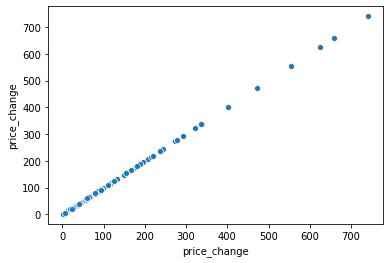

In [32]:
sns.scatterplot(y = df1.price_change, x = df1.price_change)

In [33]:
dfu350 = df1.loc[df1['price_change']<350]

In [34]:
dfa350 = df1.loc[df1['price_change']>350]

## Currencies that increased less than 4.5 times

In [36]:
dfu350 = dfu350.drop(['level_0', 'index'], axis=1)

In [37]:
dfu350

,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
8,XLMUSDT,0.255730,0.086310,196.292434,-22.75
9,TRXUSDT,0.029700,0.018240,62.828947,-283.52


In [42]:
dfu350.reset_index(inplace=True)
dfu350

,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,0,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,1,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,2,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,3,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,5,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,6,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
8,8,XLMUSDT,0.255730,0.086310,196.292434,-22.75
9,9,TRXUSDT,0.029700,0.018240,62.828947,-283.52


In [43]:
dfu350.describe()

,index,price2021-01-11,price2020-06-01,price_change,compare_to_btc
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,50.000000,374.103602,96.501693,100.269668,-1030.939895
std,29.567089,3226.524301,742.472637,87.456807,2228.818835
min,0.000000,0.000281,0.000153,1.814286,-13181.180000
25%,24.500000,0.024846,0.016820,32.056784,-652.250000
50%,50.000000,0.378100,0.221500,70.196970,-243.260000
75%,75.500000,9.922500,4.584250,165.781607,-45.350000
max,100.000000,31438.640000,7199.000000,337.951143,28.700000


In [59]:
dfu = dfu350[dfu350['symbol'].str.contains("UP")]
dfu
indlist = [80, 85, 93, 96, 99, 100]

In [63]:
dfuu = dfu350[~dfu350['index'].isin(indlist)]

In [64]:
dfuu

,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
0,0,ETHUSDT,1111.520000,253.800000,337.951143,28.70
1,1,BNBUSDT,39.784300,18.200000,118.595055,-103.18
2,2,NEOUSDT,22.466000,13.200000,70.196970,-243.26
3,3,LTCUSDT,145.000000,49.960000,190.232186,-26.67
4,4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47
5,5,ADAUSDT,0.277740,0.090390,207.268503,-16.25
6,6,XRPUSDT,0.287110,0.214700,33.726129,-614.46
7,7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80
8,8,XLMUSDT,0.255730,0.086310,196.292434,-22.75
9,9,TRXUSDT,0.029700,0.018240,62.828947,-283.52


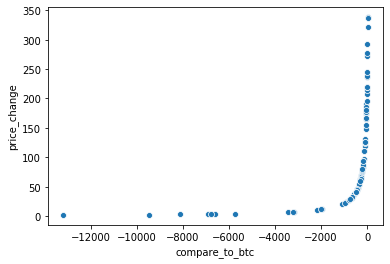

In [65]:
sns.scatterplot(y = dfuu.price_change, x = dfuu.compare_to_btc)

In [71]:
dfuu['btc'] = dfuu['price_change']/240.958574
dfuu

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc,btc
0,0,ETHUSDT,1111.520000,253.800000,337.951143,28.70,1.402528
1,1,BNBUSDT,39.784300,18.200000,118.595055,-103.18,0.492180
2,2,NEOUSDT,22.466000,13.200000,70.196970,-243.26,0.291324
3,3,LTCUSDT,145.000000,49.960000,190.232186,-26.67,0.789481
4,4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47,0.217643
5,5,ADAUSDT,0.277740,0.090390,207.268503,-16.25,0.860183
6,6,XRPUSDT,0.287110,0.214700,33.726129,-614.46,0.139967
7,7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80,0.192012
8,8,XLMUSDT,0.255730,0.086310,196.292434,-22.75,0.814631
9,9,TRXUSDT,0.029700,0.018240,62.828947,-283.52,0.260746


In [76]:
dfuu.to_csv('under350')

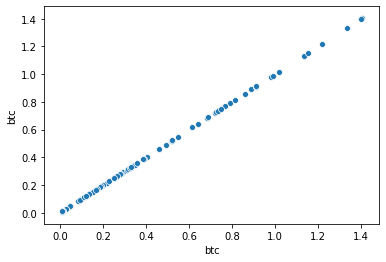

In [73]:
sns.scatterplot(y = dfuu.btc, x = dfuu.btc)

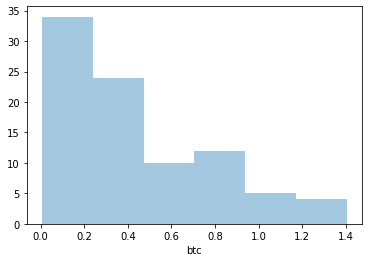

In [74]:
sns.distplot(dfuu['btc'], kde=False)

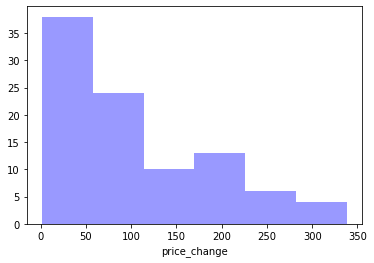

In [88]:
sns.distplot(dfu350.price_change, kde=False, color='b')

## Currencies that grew over 4.5 times

In [86]:
dfa350.describe()

,level_0,index,price2021-01-11,price2020-06-01,price_change,compare_to_btc
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,72.833333,84.500000,30.236102,3.883469,575.270369,56.316667
std,44.727695,50.492574,43.689954,5.438900,124.292448,10.137648
min,19.000000,25.000000,0.019710,0.003016,402.659842,40.160000
25%,37.500000,43.750000,0.822455,0.129500,492.941762,50.890000
50%,75.500000,87.500000,3.868795,0.748400,588.947435,58.940000
75%,109.000000,126.000000,66.019425,7.977950,649.737368,62.895000
max,122.000000,139.000000,87.116000,11.490000,740.126953,67.440000


In [77]:
dfa350

,level_0,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
14,19,25,WAVESUSDT,5.99070,1.191800,402.659842,40.16
28,35,41,THETAUSDT,1.74689,0.305000,472.750820,49.03
37,45,52,ERDUSDT,0.01971,0.003016,553.514589,56.47
70,106,123,BTCUPUSDT,87.11600,11.490000,658.189730,63.39
72,110,127,LENDUSDT,0.51431,0.071000,624.380282,61.41
79,122,139,ETHUPUSDT,86.02900,10.240000,740.126953,67.44


In [78]:
dfa350.to_csv('above350')

In [44]:
import pandas_ta as ta

# Create a DataFrame so 'ta' can be used.
df = pd.DataFrame()

# Help about this, 'ta', extension
help(df.ta)

# List of all indicators
df.ta.indicators()

# Help about the log_return indicator
help(ta.log_return)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators(df, **kwargs)
 |  
 |  AnalysisIndicators is a class that extends the Pandas DataFrame via
 |  Pandas @pd.api.extensions.register_dataframe_accessor('name') decorator.
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis that allows us
 |  to apply technical indicators by extension.  Even though 'ta' is a
 |  Pandas DataFrame Extension, you can still call the Indicators
 |  individually. Use help() if needed.
 |  
 |  By default the 'ta' extension uses lower case column names: open, high,
 |  low, close, and volume.  You can override the defaults by providing the
 |  it's replacement name when calling the indicator.  For example, to call the indicator hl2().
 |  
 |  With 'default' columns: open, high, low, close, and volume.
 |  >>> df.ta.hl2()
 |  >>> df.ta(kind="hl2")
 |  
 |  With DataFrame columns: Open, High, Low, Close, and Volume.
 |  >>>

In [80]:
## those below 350
dfu350 = dfuu
dfu350

,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc,btc
0,0,ETHUSDT,1111.520000,253.800000,337.951143,28.70,1.402528
1,1,BNBUSDT,39.784300,18.200000,118.595055,-103.18,0.492180
2,2,NEOUSDT,22.466000,13.200000,70.196970,-243.26,0.291324
3,3,LTCUSDT,145.000000,49.960000,190.232186,-26.67,0.789481
4,4,QTUMUSDT,2.933000,1.924000,52.442827,-359.47,0.217643
5,5,ADAUSDT,0.277740,0.090390,207.268503,-16.25,0.860183
6,6,XRPUSDT,0.287110,0.214700,33.726129,-614.46,0.139967
7,7,IOTAUSDT,0.378100,0.258500,46.266925,-420.80,0.192012
8,8,XLMUSDT,0.255730,0.086310,196.292434,-22.75,0.814631
9,9,TRXUSDT,0.029700,0.018240,62.828947,-283.52,0.260746


In [82]:
## those above 350
dfa350

,level_0,index,symbol,price2021-01-11,price2020-06-01,price_change,compare_to_btc
14,19,25,WAVESUSDT,5.99070,1.191800,402.659842,40.16
28,35,41,THETAUSDT,1.74689,0.305000,472.750820,49.03
37,45,52,ERDUSDT,0.01971,0.003016,553.514589,56.47
70,106,123,BTCUPUSDT,87.11600,11.490000,658.189730,63.39
72,110,127,LENDUSDT,0.51431,0.071000,624.380282,61.41
79,122,139,ETHUPUSDT,86.02900,10.240000,740.126953,67.44
